In [ ]:
!pip instal qiskit-aer

In [49]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.primitives import StatevectorSampler, Sampler
from qiskit.visualization import plot_histogram

In [6]:
par = "latex"
qr = QuantumRegister(1,"r1")
circuit = QuantumCircuit(qr)
circuit.x(qr)
circuit.h(qr)
display(circuit.draw())

┌───┐┌───┐
r1: ┤ X ├┤ H ├
    └───┘└───┘

In [55]:
#including classical bits in the circuit
#note that wires connecting classical bite are represented by double lines
X = QuantumRegister(1,"X")
Y = QuantumRegister(1,"Y")
A = ClassicalRegister(1, "A")
B = ClassicalRegister(1, "B")
circuit = QuantumCircuit(Y, X, B, A)
circuit.h(Y)
circuit.cx(Y,X)#give the control qubit first then the target qubit
circuit.measure(Y,B)
circuit.measure(qubit=X,cbit=A)
display(circuit.draw())
#first parameter is the qubit, second is the classical bit

┌───┐     ┌─┐   
  Y: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
  X: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
B: 1/═══════════╩══╬═
                0  ║ 
A: 1/══════════════╩═
                   0

C:\Users\akshi\AppData\Local\Temp\ipykernel_15756\630489147.py:2: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results = Sampler().run(circuit).result()


SamplerResult(quasi_dists=[{0: 0.5, 3: 0.5}], metadata=[{}])

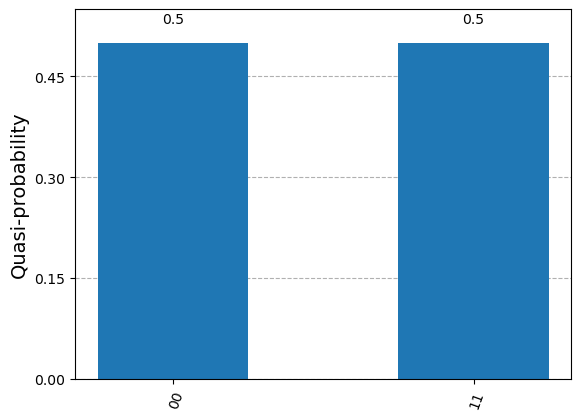

In [57]:
#running the circuit using simulator
results = Sampler().run(circuit).result()
display(results)
statistics =  results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))
#need to update to latest version

In [36]:
help(StatevectorSampler.run)

Help on function run in module qiskit.primitives.statevector_sampler:

run(self, pubs: 'Iterable[SamplerPubLike]', *, shots: 'int | None' = None) -> 'PrimitiveJob[PrimitiveResult[SamplerPubResult]]'
    Run and collect samples from each pub.
    
    Args:
        pubs: An iterable of pub-like objects. For example, a list of circuits
              or tuples ``(circuit, parameter_values)``.
        shots: The total number of shots to sample for each sampler pub that does
               not specify its own shots. If ``None``, the primitive's default
               shots value will be used, which can vary by implementation.
    
    Returns:
        The job object of Sampler's result.

